In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
import pandas as pd
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train.shape
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

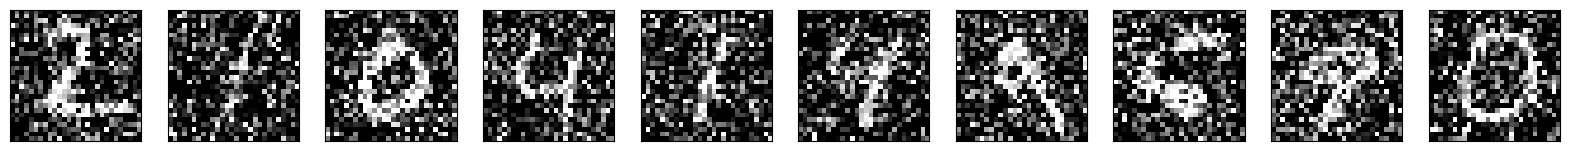

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
print("Name: Priyadharshan S")
print("Register number: 212223240127")

Name: Priyadharshan S
Register number: 212223240127


In [12]:
input_img=keras.Input(shape=(28,28,1))

# Encoder here
conv1=layers.Conv2D(32,(3,3),activation="relu",padding="same")(input_img)
maxpool1=layers.MaxPooling2D((2,2),padding='same')(conv1)

conv2=layers.Conv2D(16,(3,3),activation='relu',padding='same')(maxpool1)
encoded=layers.MaxPooling2D((2,2),padding='same')(conv2)

#Encoder Shape
print("Shape of the encoded output:",encoded.shape)

# Decoder here
conv3=layers.Conv2D(16,(3,3),activation='relu',padding='same')(encoded)
upsample1=layers.UpSampling2D((2,2))(conv3)

conv4=layers.Conv2D(32,(3,3),activation='relu',padding='same')(upsample1)
upsample2=layers.UpSampling2D((2,2))(conv4)

decoded=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(upsample2)


Shape of the encoded output: (None, 7, 7, 16)


In [13]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 16)          2320  

In [14]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [15]:
autoencoder.fit(x_train_noisy,x_train_scaled,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy,x_test_scaled))

Epoch 1/10
469/469 [==============================] - 128s 270ms/step - loss: 0.1777 - val_loss: 0.1227
Epoch 2/10
469/469 [==============================] - 108s 229ms/step - loss: 0.1193 - val_loss: 0.1144
Epoch 3/10
469/469 [==============================] - 106s 227ms/step - loss: 0.1135 - val_loss: 0.1100
Epoch 4/10
469/469 [==============================] - 109s 231ms/step - loss: 0.1102 - val_loss: 0.1075
Epoch 5/10
469/469 [==============================] - 111s 237ms/step - loss: 0.1080 - val_loss: 0.1057
Epoch 6/10
469/469 [==============================] - 109s 233ms/step - loss: 0.1063 - val_loss: 0.1042
Epoch 7/10
469/469 [==============================] - 106s 226ms/step - loss: 0.1049 - val_loss: 0.1031
Epoch 8/10
469/469 [==============================] - 105s 225ms/step - loss: 0.1038 - val_loss: 0.1020
Epoch 9/10
469/469 [==============================] - 106s 225ms/step - loss: 0.1029 - val_loss: 0.1013
Epoch 10/10
469/469 [==============================] - 105s 224m

Name: Priyadharshan S
Register number: 212223240127
313/313 [==============================] - 5s 14ms/step


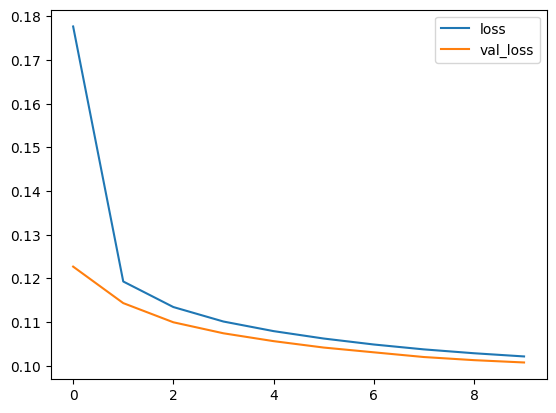

In [16]:
metrics = pd.DataFrame(autoencoder.history.history)
metrics[['loss','val_loss']].plot()
print("Name: Priyadharshan S")
print("Register number: 212223240127")
decoded_imgs = autoencoder.predict(x_test_noisy)


Name: Priyadharshan S
Register number: 212223240127


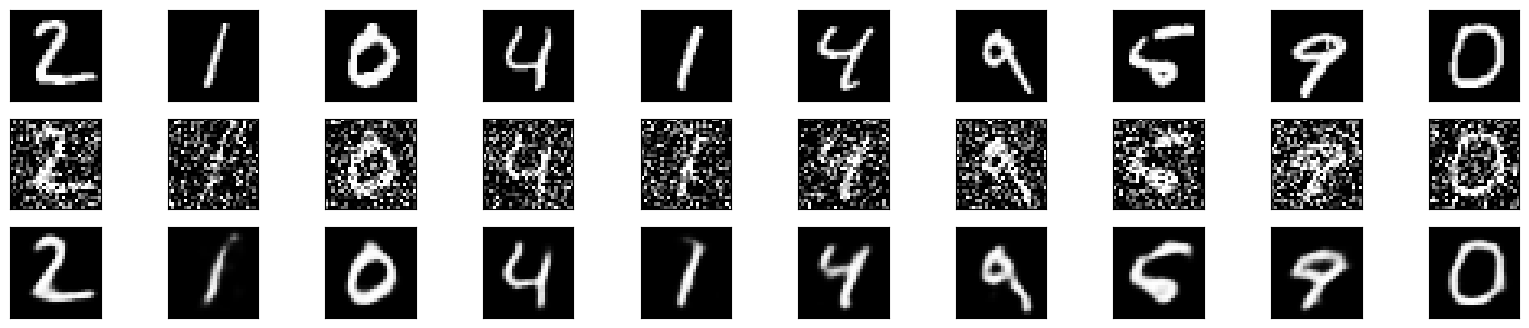

In [17]:
n = 10
print("Name: Priyadharshan S")
print("Register number: 212223240127")
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()